# ALDS Tutorial 2: Containers, zoeken, sorteren


In [118]:
import sys

# Asserts zijn handig: ingebouwde unit-testjes in Python
assert sys.version_info.major == 3, "You need python 3."
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython

assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))


from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats


Python version is (3, 11, 5, 'final', 0) -> okay
IPython version is (8, 19, 0, '') -> okay


Deze tutorial gaat weer gebruik maken van numpy arrays (np.array). Dit is een ontzettend fijn datatype dat erg geoptimaliseerd is (zowel qua memory, als runtime voor allerhande standaardfuncties). Bovendien is er gebruik van numpy arrays enorm flexibel. Deze datastructuur is dusdanig veel gebruikt en heeft zoveel impact gehad dat er een Nature-artikel (dat is één van de belangrijkste wetenschappelijke tijdschriften) over is verschenen: https://www.nature.com/articles/s41586-020-2649-2 (Zeker de moeite waard om eens te lezen). 

Qua tips voor het gebruik van numpy arrays raad ik de volgende youtube tutorial aan: https://www.youtube.com/watch?v=8Mpc9ukltVA

Wij gaan nu een aantal opdrachten doen waarbij we gebruik gaan maken van deze numpy arrays om datastructuren te maken op kop van een array. (Deze gebruik ik liever dan de Python list, omdat numpy arrays zoals gezegd echte arrays zijn.) 

## Opgave 1: een eigen Stack (een plek op silicoon)

Schrijf een eigen Stack-klasse op basis van een numpy array, waar alleen integers in mogen. Je mag zelf kiezen welk soort integers want in numpy mag je kiezen hoe groot de ints mogen zijn en of ze signed of unsigned moeten zijn. Je kan hiervoor dtype gebruiken bij het aanmaken van de array, bijvoorbeeld: dtype='int16' levert 16bit signed integers op. 

De Stack heeft een fixed capacity (de grootte van de array). Implementeer een klasse MyStack, waar in ieder geval de volgende functies in verwerkt zijn. Zet bij elke functie van de klasse een runtime-complexity analyse (dus de complexiteit middels de big-Oh notatie, en een korte uitleg daarvan). 
* push(int) (Zet een item op "kop" van de lijst - je mag zelf kiezen hoe de Stack groeit, return een boolean die zegt of het pushen gelukt it. Pushen lukt namelijk niet als de maximale capaciteit bereikt is.)
* pop() (Return en verwijder het element dat nu op kop van de Stack staat) 
* peek() (Return het element op kop van de Stack, maar verwijder hem niet) 
* isEmpty() (Return of de Stack nu leeg is, d.w.z., er nu geen elementen in staan)
* isFull() (Return of the maxCapacity bereikt is)

Daarna willen we graag de capaciteit kunnen vergroten. Voeg een functie toe 
* doubleCapacity() (Verdubbel de capaciteit van de Stack. Zorg ervoor dat de volgorde van de elementen op de Stack in tact blijft.) Wat is de runtime complexity (big-Oh) van deze functie? Leg dit uit in het commentaar.

Bedenk goede unit tests om de werking van de Stack te testen. Gebruik hiervoor het Python-commando "assert" (voor een voorbeeld, zie vorige tutorial). 

In [119]:
class myStack:
    """
    Class to make a stack

    EXAMPLE
    --------
    stack = mystack(42)
    """
    def __init__(self, max_capacity, dtype='int16'):
        """
        Constructor for Class myStack

        PARAMETERS
        ------------
        self	:	self
        max_capacity: the maximimum number of elements allowed on the stack.
        """
        self.array = np.array([], dtype)
        self.max_capacity = max_capacity
        self.index = 0

    def push(self, x): # Deze methode heeft een runtime van O(n), omdat het toevoegen van een element aan een array met 'np.append' een nieuwe array vereist waar alle bestaande waardes naar gekopieert moet worden samen met het toegevoegde getal.
        if not self.isFull():
            self.array = np.append(self.array, x)
            self.index += 1
            return True
        return False
    
    def pop(self): # Deze methode heeft een runtime van O(n), omdat het verwijderen van een element uit array met 'np.delete' een nieuwe array vereist waar alle bestaande waardes naar gekopieert moet worden na het verwijderde getal.
        if not self.isEmpty():
            self.index -= 1
            res = self.array[self.index]
            self.array = np.delete(self.array, self.index)
            return res

    def peek(self): # Deze methode heeft een runtime van O(1), omdat het rechtstreeks toegang heeft tot een specifieke index in de array zonder de array te wijzigen.
        if not self.isEmpty():
            return self.array[self.index - 1]

    def isEmpty(self): # Deze methode heeft een runtime van O(1), omdat het rechtstreeks toegang heeft tot de grootte van de array.
        return True if self.index == 0 else False

    def isFull(self): # Deze methode heeft een runtime van O(1), omdat het rechtstreeks toegang heeft tot de grootte van de array.
        return True if self.index == self.max_capacity else False

    def doubleCapacity(self): # Deze methode heeft een runtime van O(1), omdat het rechtstreeks toegang heeft tot de grootte van de array.
        self.max_capacity *= 2

In [120]:
# Unit tests
stack = myStack(1)

assert stack.max_capacity == 1,     "Array heeft geen max capacity van 1!"
assert stack.isEmpty()    == True,  "Array is niet leeg!"
assert stack.isFull()     == False, "Array hoort niet vol te zitten!"
assert stack.push(1)      == True,  "Array is vol!"
assert stack.isFull()     == True,  "Array hoort vol te zitten!"
assert stack.push(2)      == False, "Array hoort vol te zitten!"
np.testing.assert_array_equal(stack.array, np.array([1]), "Inhoud van array is verkeerd")

stack.doubleCapacity()
np.testing.assert_array_equal(stack.array, np.array([1]), "Inhoud van array is verkeerd")

assert stack.isEmpty()    == False, "Array niet leeg te zijn!"
assert stack.max_capacity == 2,     "Array capaciteit is niet verdubbelt naar 2!"
assert stack.isFull()     == False, "Array capaciteit is niet verdubbelt naar 2!"
assert stack.push(2)      == True,  "Array capaciteit is niet verdubbelt naar 2!"
assert stack.isFull()     == True,  "Array hoort vol te zitten!"
assert stack.push(3)      == False, "Array hoort vol te zitten!"
np.testing.assert_array_equal(stack.array, np.array([1, 2]), "Inhoud van array is verkeerd")

assert stack.peek()    == 2,     "Return is verkeerd"
assert stack.pop()     == 2,     "Return is verkeerd"
assert stack.peek()    == 1,     "Return is verkeerd"
assert stack.pop()     == 1,     "Return is verkeerd"
assert stack.isEmpty() == True,  "Array hoort leeg te zijn."
assert stack.isFull()  == False, "Array hoort niet vol te zijn."
np.testing.assert_array_equal(stack.array, np.array([]), "Inhoud van array is verkeerd")

## Opgave 2: Quick-sort en meer Quick-sort

De runtime van Quick-sort is erg afhankelijk van de keuze van de pivot. We gaan in deze opgave hiervoor verschillende alternatieven bekijken en vergelijken om te zien wat daar het effect van is; zowel theoretisch (in termen van de big-Oh) als in de praktijk (door runtime te meten). 

* Schrijf een functie voor het sorteren van een numpy array met Quicksort. (Zie Algoritmes 16 en 17 van hoofdstuk 7.3 in de reader)
* Pas de functie zo aan dat het aantal keer dat twee waardes vergeleken worden ook wordt gereturnt (naast de gesorteerde lijst). (NB: in Python kan je meerdere dingen tegelijk teruggeven bij een functie.) 
* Schrijf een test-functie, waarbij de gemiddelde waarde van het (bovenstaande) aantal vergelijkingen wordt geschat, door het algoritme X keer voor verschillende random lijsten van lengte L te runnen. Geef naast dit gemiddelde ook de standaardafwijking (standard deviation) terug.  
* Schrijf nu een tweede versie van quick-sort, maar nu zo dat de pivot anders wordt gekozen. Namelijk, neem de minimale waarde van tussen (en inclusief) $lo$ en $hi$ (in de array $a$) als de pivot. Geef wederom het aantal vergelijkingen terug. 
* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, en plot de resultaten middels matplotlib.pyplot (zoals we ook in de vorige tutorial hadden gedaan), vergeet niet de standaardafwijking mee te plotten als een error region. 
* Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-Oh) van QuickSort. 
* Laten we nog eens iets anders proberen voor de pivot. Schrijf nog een alternatieve versie van quicksort die op regel 1 in plaats van een random pivot of de minimumwaarde, nu de **mediaan** van de elementen tussen $lo$ and $hi$ (uit $a$) pakt. Voor de mediaan pakken we de middelste waarde. Bijvoorbeeld, de mediaan van {1, 7, 3, 8, 3, 9, 6} is 6. In Python 3 is dit geïmplementeerd met de standaardfunctie **median()** in de **statistics** module. 
* Vergelijk deze nieuwe versie door middel van je testfunctie voor verschillende groottes van inputlijsten, en voeg de resultaten toe aan je plot. 
* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
* Licht de resultaten toe, en verklaar de verschillen?
* Was het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-Oh om hier antwoord op te geven.) 

In [121]:
# Schrijf hier de code voor opgave 2
def partition(arr, lo, hi): # Gebaseerd op "Algoritme 17" uit de reader.
    comparisons = 0
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        comparisons += 1
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i, comparisons

def quickSort(arr, lo, hi): # Gebaseerd op "Algoritme 16" uit de reader.
    if lo >= hi:
        return arr, 0
    pivot, comparisons_sum  = partition(arr, lo, hi)
    arr  , comparisons_sum1 = quickSort(arr, lo, pivot - 1)
    arr  , comparisons_sum2 = quickSort(arr, pivot + 1, hi)
    return arr, comparisons_sum+comparisons_sum1+comparisons_sum2

def partition_Min(arr, lo, hi):
    comparisons = 0
    pivot = min(arr[lo:hi+1])
    pivot_index = np.where(arr[lo:hi+1] == pivot)[0][0] + lo
    arr[hi], arr[pivot_index] = arr[pivot_index], arr[hi]
    i = lo
    for j in range(lo, hi):
        comparisons += 1
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i, comparisons

def quickSort_Min(arr, lo, hi):
    if lo >= hi:
        return arr, 0
    pivot, comparisons_sum  = partition_Min(arr, lo, hi)
    arr  , comparisons_sum1 = quickSort_Min(arr, lo, pivot - 1)
    arr  , comparisons_sum2 = quickSort_Min(arr, pivot + 1, hi)
    return arr, comparisons_sum+comparisons_sum1+comparisons_sum2

def partition_Med(arr, lo, hi):
    comparisons = 0
    pivot = stats.median_low(arr[lo:hi+1])
    pivot_index = np.where(arr[lo:hi+1] == pivot)[0][0] + lo
    arr[hi], arr[pivot_index] = arr[pivot_index], arr[hi]
    i = lo
    for j in range(lo, hi):
        comparisons += 1
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i, comparisons

def quickSort_Med(arr, lo, hi):
    if lo >= hi:
        return arr, 0
    pivot, comparisons_sum  = partition_Med(arr, lo, hi)
    arr  , comparisons_sum1 = quickSort_Med(arr, lo, pivot - 1)
    arr  , comparisons_sum2 = quickSort_Med(arr, pivot + 1, hi)
    return arr, comparisons_sum+comparisons_sum1+comparisons_sum2

def measure_Average_Comparisons(L, x, function): #L(List size), x(epochs), function
    average_Comparisons = []
    for epoch in range(x):
        arr = np.random.randint(0, high=100, size=L, dtype='l')
        average_Comparisons.append(function(arr, 0, arr.size-1)[1])
    return stats.mean(average_Comparisons), stats.stdev(average_Comparisons)

def measure_Average_Runtime(L, x, function): #L(List size), x(epochs), function
    average_runtimes = []
    for epoch in range(x):
        arr = np.random.randint(0, high=100, size=L, dtype='l')
        start_time = time.time()
        function(arr, 0, arr.size - 1)
        average_runtimes.append(time.time() - start_time)
    return stats.mean(average_runtimes), stats.stdev(average_runtimes)

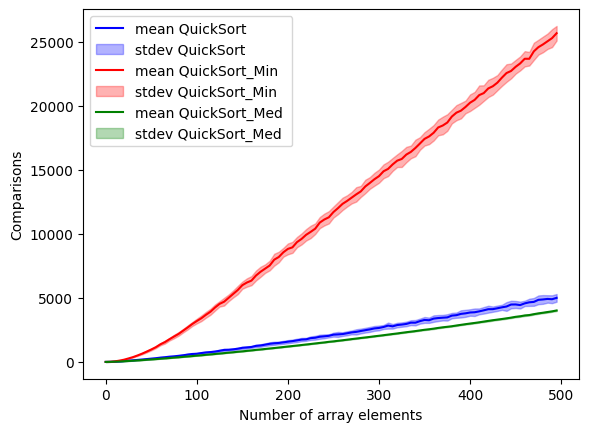

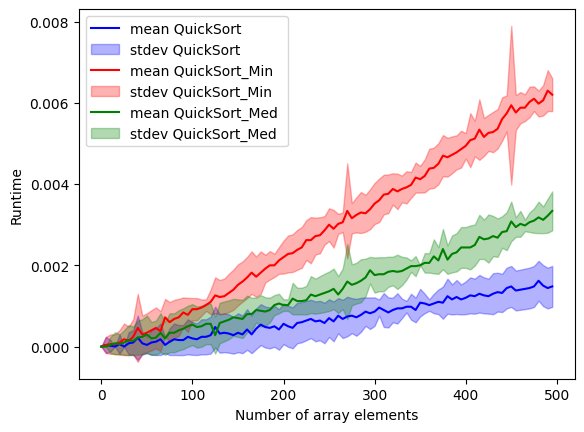

In [122]:
# Vergelijk de drie versies van quicksort op de hoeveelheid functieaanroepen voor verschillende groottes van arrays, vergeet niet de standaardafwijking mee te plotten als een error region. 
mean_comparisons_quicksort      = []
stdev_comparisons_quicksort     = []
mean_comparisons_quicksort_Min  = []
stdev_comparisons_quicksort_Min = []
mean_comparisons_quicksort_Med  = []
stdev_comparisons_quicksort_Med = []

mean_runtime_quicksort      = []
stdev_runtime_quicksort     = []
mean_runtime_quicksort_Min  = []
stdev_runtime_quicksort_Min = []
mean_runtime_quicksort_Med  = []
stdev_runtime_quicksort_Med = []

meetpunten = list(range(0, 500, 5))
for L in meetpunten:
    comparisons_Quicksort     = []
    runtime_Quicksort         = []
    comparisons_Quicksort_Min = []
    runtime_Quicksort_Min     = []
    comparisons_Quicksort_Med = []
    runtime_Quicksort_Med     = []

    for epoch in range(50):
        arr = np.random.randint(0, high=100, size=L, dtype='l')

        start = time.time()
        comparisons_Quicksort.append( quickSort( arr, 0, arr.size-1 )[1] )
        runtime_Quicksort.append(time.time() - start)
        
        start = time.time()
        comparisons_Quicksort_Min.append( quickSort_Min( arr, 0, arr.size-1 )[1] )
        runtime_Quicksort_Min.append(time.time() - start)

        start = time.time()
        comparisons_Quicksort_Med.append( quickSort_Med( arr, 0, arr.size-1 )[1] )
        runtime_Quicksort_Med.append(time.time() - start)

    mean_comparisons_quicksort.     append( stats.mean ( comparisons_Quicksort     ) )
    stdev_comparisons_quicksort.    append( stats.stdev( comparisons_Quicksort     ) )
    mean_comparisons_quicksort_Min. append( stats.mean ( comparisons_Quicksort_Min ) )
    stdev_comparisons_quicksort_Min.append( stats.stdev( comparisons_Quicksort_Min ) )
    mean_comparisons_quicksort_Med. append( stats.mean ( comparisons_Quicksort_Med ) )
    stdev_comparisons_quicksort_Med.append( stats.stdev( comparisons_Quicksort_Med ) )

    mean_runtime_quicksort.     append( stats.mean ( runtime_Quicksort     ) )
    stdev_runtime_quicksort.    append( stats.stdev( runtime_Quicksort     ) )
    mean_runtime_quicksort_Min. append( stats.mean ( runtime_Quicksort_Min ) )
    stdev_runtime_quicksort_Min.append( stats.stdev( runtime_Quicksort_Min ) )
    mean_runtime_quicksort_Med. append( stats.mean ( runtime_Quicksort_Med ) )
    stdev_runtime_quicksort_Med.append( stats.stdev( runtime_Quicksort_Med ) )

plt.plot(meetpunten, mean_comparisons_quicksort, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_comparisons_quicksort) - np.array(stdev_comparisons_quicksort),
    np.array(mean_comparisons_quicksort) + np.array(stdev_comparisons_quicksort),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_comparisons_quicksort_Min, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_comparisons_quicksort_Min) - np.array(stdev_comparisons_quicksort_Min),
    np.array(mean_comparisons_quicksort_Min) + np.array(stdev_comparisons_quicksort_Min),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_comparisons_quicksort_Med, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_comparisons_quicksort_Med) - np.array(stdev_comparisons_quicksort_Med),
    np.array(mean_comparisons_quicksort_Med) + np.array(stdev_comparisons_quicksort_Med),
    color="g",
    alpha=0.3,
)
plt.xlabel("Number of array elements")
plt.ylabel("Comparisons")
plt.legend(["mean QuickSort", "stdev QuickSort", "mean QuickSort_Min ", "stdev QuickSort_Min ", "mean QuickSort_Med ", "stdev QuickSort_Med "], loc="upper left")
plt.show()

plt.plot(meetpunten, mean_runtime_quicksort, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_runtime_quicksort) - np.array(stdev_runtime_quicksort),
    np.array(mean_runtime_quicksort) + np.array(stdev_runtime_quicksort),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_runtime_quicksort_Min, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_runtime_quicksort_Min) - np.array(stdev_runtime_quicksort_Min),
    np.array(mean_runtime_quicksort_Min) + np.array(stdev_runtime_quicksort_Min),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_runtime_quicksort_Med, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_runtime_quicksort_Med) - np.array(stdev_runtime_quicksort_Med),
    np.array(mean_runtime_quicksort_Med) + np.array(stdev_runtime_quicksort_Med),
    color="g",
    alpha=0.3,
)
plt.xlabel("Number of array elements")
plt.ylabel("Runtime")
plt.legend(["mean QuickSort", "stdev QuickSort", "mean QuickSort_Min ", "stdev QuickSort_Min ", "mean QuickSort_Med ", "stdev QuickSort_Med "], loc="upper left")
plt.show()

*beantwoordt hier de vragen van opgave 2*

* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-Oh) van QuickSort. 

Wanneer we de twee versies van QuickSort vergelijken, waarbij de pivot het kleinste getal is en een willekeurig getal (in het geval van Algoritme 17 het latste getal in de array) voor verschillende groottes van arrays, kunnen we enkele observaties doen. Quicksort met een willekeurig pivot is consistent sneller terwijl beide algoritme's een worst-case timecomplexity hebben van O(n²) en een gemiddelde time complexity van O(n log n). 

Toch is het niet zo gek dat QuickSort met een willekeurige pivot over het algemeen sneller is dan QuickSort met het kleinste getal als pivot, Omdat het algoritme met het kleinste getal als pivot sneller zijn worst-case scenario's zal benaderen doordat de partities zeer onevenwichtig zijn, wat resulteert in een groot aantal vergelijkingen en verschuivingen. 


* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
Licht de resultaten toe, en verklaar de verschillen?

Bij de runtime vergelijkingen is het te verwachten dat de willekeurige QuickSort iets sneller is, maar dat het verschil niet heel groot zal zijn. Bij beide gevallen hebben ze nog steeds dezelfde worst-case time complexity namelijk O(n²) Het enige verschil is dat er bij de quicksort_min vaker de worst-case scenario wordt gepakt dan bij de willekeurige quicksort zal de worst case minder vaak voorkomen.


* Was het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-Oh om hier antwoord op te geven.) 
Het sorteren aan de hand van de Mediaan is in theorie een goed idee aangezien de worst-case time complexity wordt verlaagd naar O(n log n), maar in de praktijk lijkt het niet een al te goed idee aangezien de mediaan eerst gevonden moet worden wat het algoritme trager maakt.

## Opgave 3: Priority Queue (waarin we zelf een datastructuur gaan kiezen om een andere datastructuur bovenop te bouwen)

**NB: voor deze opgave heb je een partner nodig. (Nee, geen romantische partner, een practicumpartner die ook deze cursus volgt.) Neem contact op met het groepje waarin je bent ingedeeld voor de besprekingsmomenten, en bespreek vooraf de keuzes voor deze opgave (qua datastructuur). Het is van belang dat niet iedereen dezelfde datastructuur pakt namelijk, anders valt er weinig te vergelijken. *Als je niet bent ingedeeld, of je je groepsgenoten reageren niet, neem dan zsm even contactop met Marius of Diederik, dan zoeken we naar een oplossing.*  **

PriorityQueues zijn een datastructuur met de volgende eigenschappen: 
* Het is een wachtrij, waarbij elk element een *prioriteit* toegekend krijgt. Deze prioriteit is meestal een integer, (maar soms kan het ook een float zijn). 
* Bij gelijke *prioriteit* (dus bijvoorbeeld, alle elementen in de rij hebben prioriteit *1*) gedraagt een priority queue zich net zoals een queue; first in first out (FIFO)
* Echter, als er een element met een hogere prioriteit wordt toegevoegd gaat deze eerst. 

Priority Queues worden veel gebruikt bij dingen als task-scheduling binnen applicaties, het OS, of de cloud (https://www.researchgate.net/publication/257726215_A_Priority_Based_Job_Scheduling_Algorithm_in_Cloud_Computing), wachtrijen voor verzenden (telefoongespreken zijn belangrijker dan e-mails want ze moeten real-time) (https://patentimages.storage.googleapis.com/72/1a/c2/7cd0205566e125/US7310670.pdf), maar ook bijvoorbeeld binnen zelf-lerende systemen door te kijken naar welke "ervaringen" de meeste leeropbrengst zouden opleveren (en die dan eerst verwerken) zodat het systeem sneller leert (https://link.springer.com/content/pdf/10.1007/BF00993104.pdf). 

In deze opgave gaan we kijken naar hoe we een priority kunnen bouwen, bovenop eenvoudigere datastructuren. De datastructuur onliggend aan een PriorityQueue zouden we namelijk wel eens anders moeten kunnen willen kiezen dan een gewone queue: het inserten van nieuwe elementen (die nu midden in de queue zouden kunnen komen) is namelijk een stuk lastiger (we zouden makkelijk elementen moeten kunnen toevoegen in het midden van de priority queue).

Enkele tips hierbij: kijk alvast eens naar recursieve datastructuren (volgend college) zoals de doubly linked list. Of verzin zelf een slimme list om priorities er goed in te krijgen. (Je zou bijvoorbeeld voordeel kunnen hebben als je van te voren al weet dat er bijvoorbeeld tien mogelijke prioriteiten zijn - als je zo'n aanname wilt maken, geef dit dan duidelijk aan in het commentaar.) Als je helemaal los wilt gaan, kijk dan eens naar de heap datastructuur (ook wel een heap-boom, https://en.wikipedia.org/wiki/Heap_(data_structure) , NB: dit is niet hetzelfde als de "heap" als rereserveerde geheugenruimte op een chip; daar wordt ongelukkigerwijs helaas dezelfde naam voor gebruikt, maar is iets compleet anders.)

* Onderzoek samen met je practicumpartner mogelijke keuzes voor de onderliggende datastructuur voor een priority queue, en spreek af wie welke gaat doen. (Twee verschillenden)
* Leg voor de keuze die jij zelf gaat implementeren waarom jullie deze gekozen hebben. 
* Implementeer de priority queue met de gekozen datastructuur, en daarbij de volgende functies: 
    * **queue(v, p)** adds value $v$ with priority $p$ to the queue.
    * **dequeue()** returns the value with the highest priority and removes the element from the queue.
    * **contains(v)** returns \textit{True} if and only if the queue contains value $v$.
    * **remove(e)** removes all elements with value $v$ from the queue.
* Analyseer de time complexity van deze priority queue functies zoals je ze hebt geïmplementeerd. Zet je analyse in het commentaar bij de code (zowel de argumentatie als het big-Oh resultaat).
* Schrijf een testfunctie voor alle bovenstaande functies om de runtime te meten bij het inserten (queue) van X random waardes met random prioriteiten, het dequeuen van al deze X waarden, het vinden (contains) van Y random waarden (uiteraard kleiner dan X, en te testen vóór alles gedequeued is), en het removen van Z waarden (wederom kleiner dan X en het best los te testen onafhankelijk van de andere functies). 
* Neem nu de implementatie over van je practicumpartner in een aparte cell, en maak daaronder een runtimevergelijking voor alle vier de functies. Plot de resultaten met matplotlib.pyplot, met zowel de gemiddelden als de standaardafwijken (als error regions), zoals we gewend zijn van de eerste tutorial. 
* Welke verschillen zie je in de plotjes? Kan je dit verklaren? Zijn er bijvoorbeeld verschillen qua time complexity?


*leg hier je keuze voor de onderliggende datastructuur uit*

In [123]:
# schrijf hier je eigen implementatie van de priority queue, met runtime analyse in het commentaar, en de testfunctie

class myPriorityQueue():
    def __init__(self):
        self.array = []
    
    def queue(self, v, p): # O(n): De functie gaat worst-case langs alle elementen in de lijst om de juiste positie te vinden.
        index = 0
        while index < len(self.array) and self.array[index][1] <= p:
            index += 1
        self.array.insert(index, (v, p))

    def dequeue(self): # O(1): De functie controleert eigenlijk alleen of de lijst leeg is en zo niet geeft hij het eerste getal terug.
        if len(self.array) == 0:
            return None
        return self.array.pop(0)[0]

    def contains(self, v): # O(n): Als het getal wat je zoekt niet in de lijst zit gaat de functie de hele lijst af waardoor het een time complexity heeft van O(n)
        for item in self.array:
            if item[0] == v:
                return True
        return False
    
    def remove(self, v): # O(n): De functie gaat langs alle elementen in de lijst en kopieert de waardes die niet overeenkomen met de waarde die je probeert te verwijderen.
        self.array = [(value, priority) for value, priority in self.array if value != v]



In [124]:
# Unit Tests
pq = myPriorityQueue()

assert pq.contains('A') == False, "Array hoort geen 'a' te bevatten!"

pq.queue('A', 2)
pq.queue('B', 1)
pq.queue('C', 3)

assert pq.dequeue() == 'B', "Hoogste prioriteit hoort 'B' te zijn!"
assert pq.contains('B') == False, "'B' hoort verwijdert te zijn!"
assert pq.contains('C') == True, "Array hoort 'C' te bevatten!"

pq.remove('C')

assert pq.contains('C') == False, "Array hoort 'C' verwijdert te hebben!"


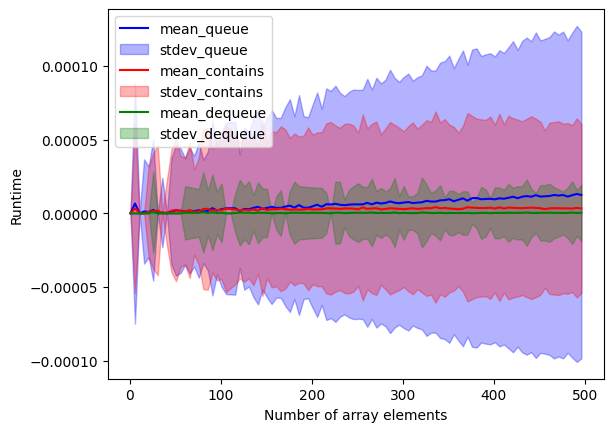

In [125]:
# Ik heb helaas geen practicumpartner, omdat ik een bezemstudent ben die op dit moment met zijn afstudeerstage bezig is. Ik heb dus alleen maar de runtime gemeten van mijn vier functies.
pq = myPriorityQueue()

mean_queue     = []
stdev_queue    = []
mean_contains  = []
stdev_contains = []
mean_dequeue   = []
stdev_dequeue  = []

meetpunten = list(range(1, 500, 5))

for L in meetpunten:
    queue    = []
    contains = []
    dequeue  = []
    
    for epoch in range(50): 
        for X in range(L): # Insert X elements in queue
            randomValue    = np.random.randint(0, high=100)
            randomPriority = np.random.randint(0, high=10)
            start = time.time()
            pq.queue(randomValue, randomPriority)
            queue.append(time.time() - start)
        for Y in range(L): # Search Y elements in queue
            randomSearch = np.random.randint(0, high=100)
            start = time.time()
            pq.contains(randomSearch)
            contains.append(time.time() - start)
        for X in range(L): # Pop X elements from queue
            start = time.time()
            pq.dequeue()     
            dequeue.append(time.time() - start)
    mean_queue.append(stats.mean(queue))
    stdev_queue.append(stats.stdev(queue))
    mean_contains.append(stats.mean(contains))
    stdev_contains.append(stats.stdev(contains))
    mean_dequeue.append(stats.mean(dequeue))
    stdev_dequeue.append(stats.stdev(dequeue))

plt.plot(meetpunten, mean_queue, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_queue) - np.array(stdev_queue),
    np.array(mean_queue) + np.array(stdev_queue),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_contains, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_contains) - np.array(stdev_contains),
    np.array(mean_contains) + np.array(stdev_contains),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_dequeue, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_dequeue) - np.array(stdev_dequeue),
    np.array(mean_dequeue) + np.array(stdev_dequeue),
    color="g",
    alpha=0.3,
)
plt.xlabel("Number of array elements")
plt.ylabel("Runtime")
plt.legend(["mean_queue", "stdev_queue", "mean_contains", "stdev_contains", "mean_dequeue", "stdev_dequeue"], loc="upper left")
plt.show()